In [1]:
import tensorflow as tf         #importing tensorflow for computing.

In [4]:
import matplotlib               # inserting just to check the graph that how the data looks
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------- ----- 143.4/165.5 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/8.0 MB 18.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.6/8.0 MB 7.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.0 MB 4.3 MB/s eta 0:00:02
   ---- ------------------------------

In [5]:
mnist =tf.keras.datasets.mnist  #data set of hand written digits.

In [6]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

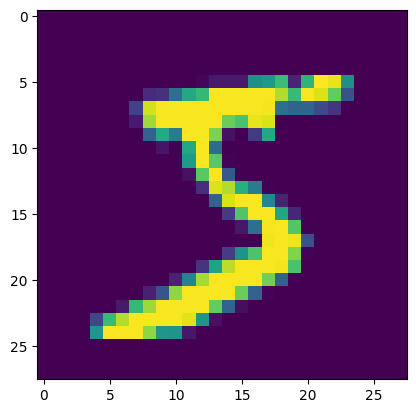

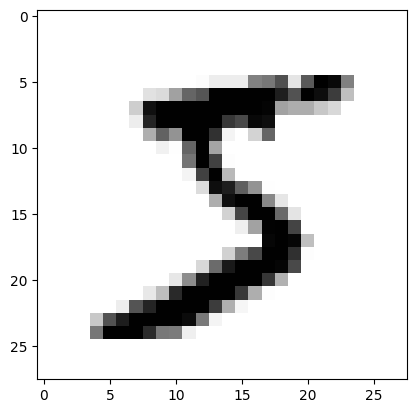

In [8]:
plt.imshow(x_train[0])          #checking the graph of a random image.
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

## Noramlizing the data [Pre_Processing Step]

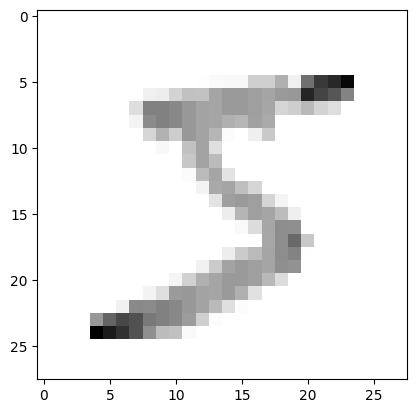

In [9]:
#### noramlizing the dataset.
import numpy as np
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

### Resizing images to make it suitable for apply Convolution Operation.

In [10]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #INCREASIN one dimension for kernel operation.
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)   #INCREASIN one dimension for kernel operation
print("Training Samples Dimension: ",x_trainr.shape)
print("Testing Samples Dimension: ",x_testr.shape)

Training Samples Dimension:  (60000, 28, 28, 1)
Testing Samples Dimension:  (10000, 28, 28, 1)


## Creating  a Deep Neural Network

### Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
#### Creating a Neural Network 
model =Sequential()

##First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))  #pnly the first concolution layer to mention input layer size.
model.add(Activation('relu'))                               #activation function to make it non-linear,<0 remove,>0 allow
model.add(MaxPooling2D(pool_size=(2,2)))                    #here we are maxpooling

##Second Convolution Layer
model.add(Conv2D(64,(3,3)))                                 #2nd layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

##Thirdt Convolution Layer
model.add(Conv2D(64,(3,3)))                                 #3rd layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

### Fully Connected Layer #1
model.add(Flatten())                                        #used to flatten to convert 2d to 1D
model.add(Dense(64))
model.add(Activation("relu"))


### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

####Last Fully Connected Layer , output must be equal to number of classes, 10(0-9)
model.add(Dense(10))                                       #last dense layer must be equal to 10
model.add(Activation('softmax'))                           #Activation function is changed to Softmax (Class Probabilities)


c:\Users\Administrator\Desktop\msc project 2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()                                            #for checking the summary of our model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])     #compiling our data and using accuracy as matrics to put focus on it.                                     

## Training our model
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)                                

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.7830 - loss: 0.6592 - val_accuracy: 0.9641 - val_loss: 0.1164
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.9655 - loss: 0.1127 - val_accuracy: 0.9709 - val_loss: 0.0934
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9767 - loss: 0.0745 - val_accuracy: 0.9774 - val_loss: 0.0757
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9843 - loss: 0.0539 - val_accuracy: 0.9691 - val_loss: 0.1045
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.9859 - loss: 0.0454 - val_accuracy: 0.9785 - val_loss: 0.0747


## Evaluating our model on testing dataset MNIST

In [16]:
test_loss,test_acc = model.evaluate(x_testr,y_test)

print("Test Loss on 10,000 test samples is= ",test_loss)
print("Validation Accuracy on 10,000 test samples is= ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9779 - loss: 0.0794
Test Loss on 10,000 test samples is=  0.06441934406757355
Validation Accuracy on 10,000 test samples is=  0.9810000061988831


#### `Accuricy of our model in pretty good.`

# Saving our Model:-

In [23]:
model.save('msc project 2/Handwritten-Digit-And-Character-Recognition-main/Project/saved_model.h5')

In [26]:
#LOADING OUR SAVED MODEL FOR CHECKING.
from tensorflow.keras.models import load_model  
new_model=load_model('msc project 2/Handwritten-Digit-And-Character-Recognition-main/Project/saved_model.h5')

In [27]:
#CHECKING THE SAVED MODELS  SUMMARY.
new_model.summary()                             

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,068 (316.68 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### `Our model has been saved successfully`